<h1 style='color:purple' align='center'>Data Science Regression Project: Predicting geometry of bead in Additive Manufacturing</h1> 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel('Ding.et.al.xlsx')
df.head()

,Wire_feed,Travel_speed,Stick_out,Height,Width
0,5.0,0.35,9,3.43,6.74
1,5.0,0.46,11,2.96,5.97
2,5.0,0.58,13,2.59,5.48
3,5.0,0.70,15,2.33,5.32
4,5.7,0.35,11,3.36,7.70


<h4 style= 'color:blue'>Checking N/A values, general trend and outliers</h4>

In [3]:
df.isnull().sum()

Wire_feed       0
Travel_speed    0
Stick_out       0
Height          0
Width           0
dtype: int64

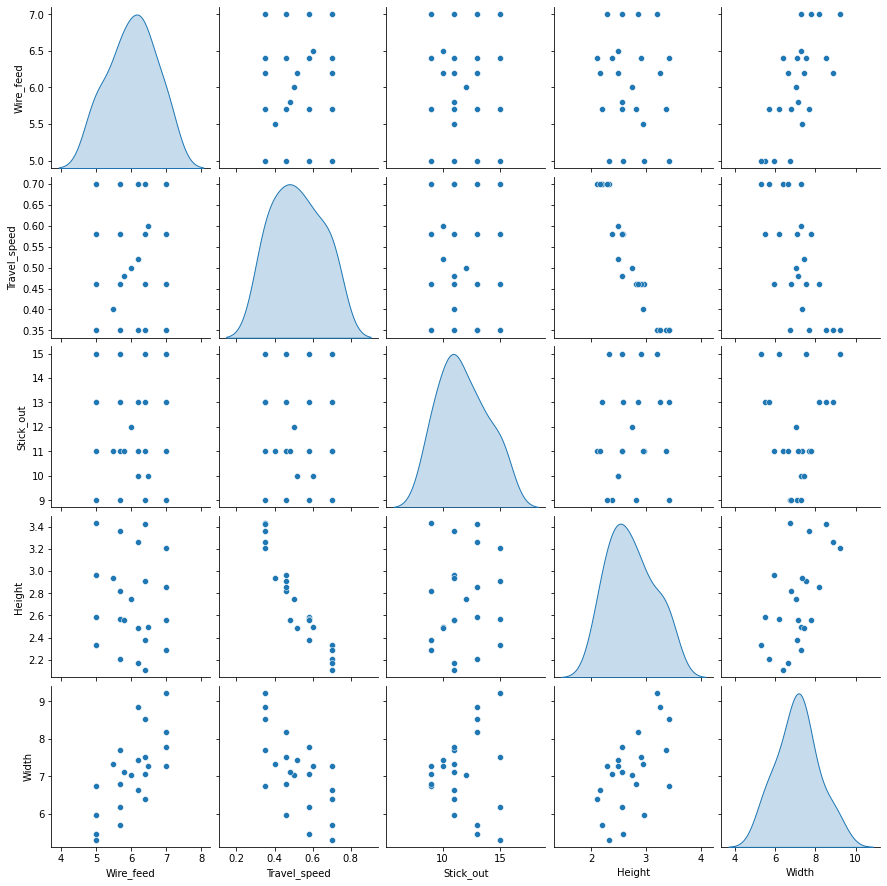

In [4]:
sns.pairplot(df,diag_kind='kde')

<AxesSubplot:>

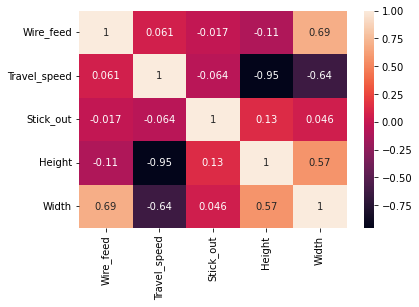

In [5]:
sns.heatmap(df.corr(),annot=True)

<h4 style= 'color:blue'>Setting the independent and dependent variables</h4>

In [6]:
X=df.drop(['Height','Width'],axis='columns')
height=pd.DataFrame(df['Height'])
width=pd.DataFrame(df['Width'])

<h4 style= 'color:blue'>Feature Scaling</h4>

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))
X_scaled.head()

,0,1,2
0,0.00,0.000000,0.000000
1,0.00,0.314286,0.333333
2,0.00,0.657143,0.666667
3,0.00,1.000000,1.000000
4,0.35,0.000000,0.333333


<h4 style= 'color:blue'>Splitting data into Training and testing set</h4>

In [8]:
from sklearn.model_selection import train_test_split
X_scaled_h_train,X_scaled_h_test,height_train,height_test=train_test_split(X_scaled,height,test_size=0.2,random_state=10)

<h4 style= 'color:blue'>Importing the required regressors</h4>

In [9]:
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [10]:
regressors = [
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    SVR(),
    LinearRegression(),
    Ridge(),
    Lasso(), 
    KNeighborsRegressor()    
]

<h3 style= 'color:red'>Preparing a model for height prediction</h3>

<h4 style= 'color:blue'>Calculating the score of different regressors and comparing their scores and errors</h4>

<h5 style= 'color:black'>Choosing model to predict height of bead</h5>

In [11]:
height_scores=[]

for model_height in regressors[:] :
    model_height.fit(X_scaled_h_train, height_train.values.ravel())
    height_pred = model_height.predict(X_scaled_h_test)   
    height_scores.append({
        'Model':model_height,
        'Score':model_height.score(X_scaled_h_test, height_test.values.ravel()),
        'Mean_Square_Error':mean_squared_error(height_test, height_pred),
    })

results_height = pd.DataFrame(height_scores,columns=['Model','Score','Mean_Square_Error'])
results_height
   

,Model,Score,Mean_Square_Error
0,"(ExtraTreeRegressor(random_state=1811935947), ...",0.896045,0.011457
1,"(DecisionTreeRegressor(max_features='auto', ra...",0.934829,0.007183
2,SVR(),0.828402,0.018913
3,LinearRegression(),0.986878,0.001446
4,Ridge(),0.824198,0.019376
5,Lasso(),-0.519228,0.167443
6,KNeighborsRegressor(),0.709995,0.031963


<h5 style= 'color:red'>Linear Regression clearly has the best score to predict height of bead</h5>

<h5 style= 'color:black'>Choosing model to predict width of bead</h5>

In [12]:
X_scaled_w_train,X_scaled_w_test,width_train,width_test=train_test_split(X_scaled,width,test_size=0.2,random_state=6)

In [13]:
width_scores=[]

for model_width in regressors[:] :
    model_width.fit(X_scaled_w_train, width_train.values.ravel())
    width_pred = model_width.predict(X_scaled_w_test)   
    width_scores.append({
        'Model':model_width,
        'Score':model_width.score(X_scaled_w_test, width_test.values.ravel()),
        'Mean_Square_Error':mean_squared_error(width_test, width_pred),
    })

results_width = pd.DataFrame(width_scores,columns=['Model','Score','Mean_Square_Error'])
results_width

,Model,Score,Mean_Square_Error
0,"(ExtraTreeRegressor(random_state=1917175113), ...",0.610151,0.382451
1,"(DecisionTreeRegressor(max_features='auto', ra...",0.190031,0.794599
2,SVR(),0.973766,0.025736
3,LinearRegression(),0.962824,0.036470
4,Ridge(),0.792132,0.203923
5,Lasso(),-0.052680,1.032704
6,KNeighborsRegressor(),0.910307,0.087991


<h5 style= 'color:red'>Support Vector Regression has the best score to predict width of bead</h5>

<h4 style= 'color:blue'>Finalizing the models to predict height and width of bead</h4>

In [14]:
model_height_final=LinearRegression()
model_height_final.fit(X_scaled_h_train, height_train.values.ravel())

LinearRegression()

In [15]:
model_width_final=SVR()
model_width_final.fit(X_scaled_w_train, width_train.values.ravel())

SVR()

<h5 style= 'color:red'>Let us check the prediction by picking a random available data point</h5>

In [16]:
df[7:8]

,Wire_feed,Travel_speed,Stick_out,Height,Width
7,5.7,0.7,13,2.21,5.7


In [17]:
data=[5.7,0.70,13]

In [18]:
scaled_data=scaler.transform([data])

In [19]:
print('Predicted height of bead is:\t',model_height_final.predict(scaled_data),'\nActual height of bead is:\t',df.at[7,'Height'])

Predicted height of bead is:	 [2.20072746] 
Actual height of bead is:	 2.21


In [20]:
print('Predicted width of bead is:\t',model_width_final.predict(scaled_data),'\nActual width of bead is:\t',df.at[7,'Width'])

Predicted width of bead is:	 [5.89222977] 
Actual width of bead is:	 5.7


<h5 style= 'color:red'>Let us find out the prediction for new data point</h5>

In [21]:
data=[3.5,0.55,10]

In [22]:
scaled_data=scaler.transform([data])

In [23]:
print('Predicted height of bead is:\t',model_height_final.predict(scaled_data))

Predicted height of bead is:	 [2.68699457]


In [24]:
print('Predicted width of bead is:\t',model_width_final.predict(scaled_data))

Predicted width of bead is:	 [6.76423948]


<h4 style= 'color:blue'>This way we can predict the height and width of the beads based on the input parameters</h4>